Import useful libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mount the drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = 'https://drive.google.com/drive/my-drive/minute_weather.csv'

#Better copy data from Drive as an archive
zip_path = '/content/drive/My Drive/minute_weather.csv.zip'

!cp "{zip_path}" .

!unzip -q minute_weather.csv.zip

# Remove .zip file after you unzip it
!rm minute_weather.csv.zip

# Make sure it's there
!ls

replace minute_weather.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
drive  minute_weather.csv  sample_data


Load the data and explore it

In [ ]:
data = pd.read_csv('minute_weather.csv')

In [ ]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [ ]:
data.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587257e+06,1.587257e+06,1.587257e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.587256e+06,1.587256e+06,1.587257e+06
mean,7.936280e+05,9.168301e+02,6.185144e+01,1.619654e+02,2.774272e+00,1.634030e+02,3.399813e+00,1.668264e+02,2.133130e+00,1.854836e-03,5.361460e-01,4.760837e+01
std,4.582018e+05,3.051593e+00,1.183362e+01,9.520812e+01,2.060758e+00,9.236723e+01,2.423167e+00,9.746275e+01,1.745345e+00,9.609716e-01,8.114766e+01,2.621454e+01
min,0.000000e+00,9.050000e+02,3.164000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01
25%,3.968140e+05,9.148000e+02,5.270000e+01,6.200000e+01,1.300000e+00,6.800000e+01,1.600000e+00,7.700000e+01,8.000000e-01,0.000000e+00,0.000000e+00,2.470000e+01
50%,7.936280e+05,9.167000e+02,6.224000e+01,1.820000e+02,2.200000e+00,1.870000e+02,2.700000e+00,1.800000e+02,1.600000e+00,0.000000e+00,0.000000e+00,4.470000e+01
75%,1.190442e+06,9.187000e+02,7.088000e+01,2.170000e+02,3.800000e+00,2.230000e+02,4.600000e+00,2.120000e+02,3.000000e+00,0.000000e+00,0.000000e+00,6.800000e+01
max,1.587256e+06,9.295000e+02,9.950000e+01,3.590000e+02,3.230000e+01,3.590000e+02,3.600000e+01,3.590000e+02,3.200000e+01,6.550100e+02,6.330500e+04,9.300000e+01


In [ ]:
data.info

<bound method DataFrame.info of            rowID     hpwren_timestamp  ...  rain_duration  relative_humidity
0              0  2011-09-10 00:00:49  ...            NaN               60.5
1              1  2011-09-10 00:01:49  ...            0.0               39.9
2              2  2011-09-10 00:02:49  ...            0.0               43.0
3              3  2011-09-10 00:03:49  ...            0.0               49.5
4              4  2011-09-10 00:04:49  ...            0.0               58.8
...          ...                  ...  ...            ...                ...
1587252  1587252  2014-09-10 23:55:29  ...            0.0               46.3
1587253  1587253  2014-09-10 23:56:29  ...            0.0               46.2
1587254  1587254  2014-09-10 23:57:29  ...            0.0               46.3
1587255  1587255  2014-09-10 23:58:29  ...            0.0               46.2
1587256  1587256  2014-09-10 23:59:29  ...            0.0               46.3

[1587257 rows x 13 columns]>

In [ ]:
data.isnull().sum()

rowID                   0
hpwren_timestamp        0
air_pressure            0
air_temp                0
avg_wind_direction    433
avg_wind_speed        433
max_wind_direction    433
max_wind_speed        433
min_wind_direction    433
min_wind_speed        433
rain_accumulation       1
rain_duration           1
relative_humidity       0
dtype: int64

Create a Subset of the data by sampling

In [ ]:
# the data is quite large and has lots of rows, hence we sample it

sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [ ]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [ ]:
sampled_df.isnull().sum()

rowID                  0
hpwren_timestamp       0
air_pressure           0
air_temp               0
avg_wind_direction    46
avg_wind_speed        46
max_wind_direction    46
max_wind_speed        46
min_wind_direction    46
min_wind_speed        46
rain_accumulation      1
rain_duration          1
relative_humidity      0
dtype: int64

In [ ]:
sampled_df = sampled_df.fillna(sampled_df.mean())

In [ ]:
sampled_df.isnull().sum().sum()

0

In [ ]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

Select Features for Clustering

In [ ]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [ ]:
select_df = sampled_df[features]

In [ ]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [ ]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


Scale the Dataset

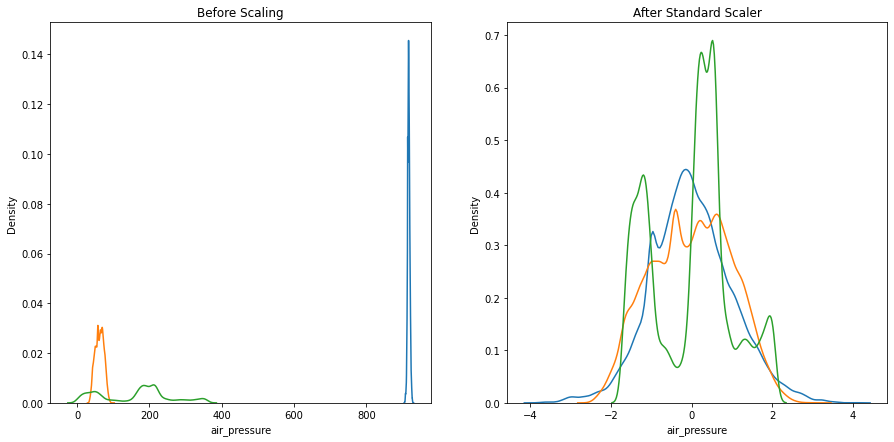

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(select_df)
scaled_df = pd.DataFrame(scaled_df, columns= ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

ax1.set_title('Before Scaling')
sns.kdeplot(select_df['air_pressure'], ax=ax1)
sns.kdeplot(select_df['air_temp'], ax=ax1)
sns.kdeplot(select_df['avg_wind_direction'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['air_pressure'], ax=ax2)
sns.kdeplot(scaled_df['air_temp'], ax=ax2)
sns.kdeplot(scaled_df['avg_wind_direction'], ax=ax2)
plt.show()

Create the Cluster

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Create and fit a range of models
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters = clust, random_state=42)
    km = km.fit(scaled_df)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

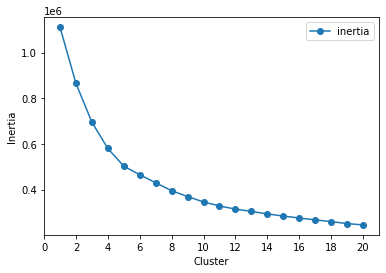

In [ ]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [ ]:
centers = km.cluster_centers_
centers

array([[-0.86609358, -0.20865415,  0.45781658,  1.71248573,  0.53859949,
         1.64368626,  0.25922484],
       [-0.67782685,  0.23984799,  0.10097727, -0.77564795,  0.30124429,
        -0.78124733,  0.03655709],
       [ 1.20517581, -0.34519529, -1.16619095,  2.71301367, -1.0687161 ,
         2.84302314, -1.15988118],
       [-0.47609485,  0.08772512, -1.20205564, -0.54505698, -1.08808723,
        -0.5784485 ,  0.24425737],
       [ 0.37622062, -0.95867095,  1.31377724, -0.58422273,  1.60014979,
        -0.51904571,  0.92877699],
       [-0.10889879,  1.18089362,  0.30562728, -0.60442537,  0.48603414,
        -0.61176598, -0.67917883],
       [ 0.04901777, -1.26705413,  0.4069712 ,  0.74438174,  0.51824221,
         0.70584293,  1.32458441],
       [ 0.4527106 , -1.13074342, -1.26227585, -0.5466106 , -1.10146538,
        -0.55417454,  1.05860204],
       [ 1.2168375 , -0.10464781, -1.14738849,  1.03990867, -1.03565979,
         1.12025328, -1.06968455],
       [-0.6300582 ,  0.1803

Getting the optimum number of clusters

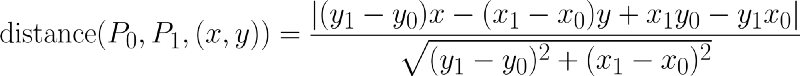

In [ ]:
def calculate_wcss(data):
        wcss = []
        for n in range(2, 21):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            wcss.append(kmeans.inertia_)
    
        return wcss

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = np.abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [ ]:
# calculating the within clusters sum-of-squares for 19 cluster amounts
sum_of_squares = calculate_wcss(scaled_df)
    
    # calculating the optimal number of clusters
n = optimal_number_of_clusters(sum_of_squares)
n

8

**From the equation used, we can see that the optimum number of cluster to use is 8**

**C'est Fini**